##Importing Library and Reading Data

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Dataset/churn_data.csv")
df.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
df.shape

(27000, 31)

##Treating Missing Columns

In [4]:
df.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [5]:
df['age'].dtype=='float64'

True

In [6]:
#Finding numerical columns with missing value
mis_cols=[]
for col in df.columns:
  if df[col].isnull().sum()>0 and (df[col].dtype=='float64' or df[col].dtype=='int64'):
    mis_cols.append(col)
mis_cols

['age', 'credit_score', 'rewards_earned']

In [7]:
def treat_missing_column(dataFrame, mis_cols, what_to_do):
    if what_to_do == 'mean':
        from sklearn.impute import SimpleImputer
        imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
        imputer.fit(dataFrame[mis_cols])
        dataFrame[mis_cols]=imputer.transform(dataFrame[mis_cols])
        return dataFrame
    elif what_to_do == 'drop':
        dataFrame.drop(columns=mis_cols,inplace=True)
        return dataFrame
df=treat_missing_column(df,mis_cols,'mean')

##EDA

In [8]:
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964100,51.178654,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,20.618536,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,522.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.944225,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.110125,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,562.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


###Plotting Histograms and Pie Charts

In [9]:
def plot_hist_each_col(dataFrame):
    col=np.floor(np.sqrt(dataFrame.shape[1]))
    row=int(dataFrame.shape[1]/col)+1
    plt.figure(figsize=(5*col,5*row));
    plt.suptitle("Histogram of Values",fontsize=20);
    for i in range(0,dataFrame.shape[1]):
        plt.subplot(row,col,i+1);
        f=plt.gca();
        f.set_title(dataFrame.columns[i]);
        vals=dataFrame.iloc[:,i].nunique();
        plt.hist(dataFrame.iloc[:,i],bins=vals);
    plt.tight_layout(rect=[0,0.03,1,0.95]);
    #plt.savefig('Histogram.jpg')

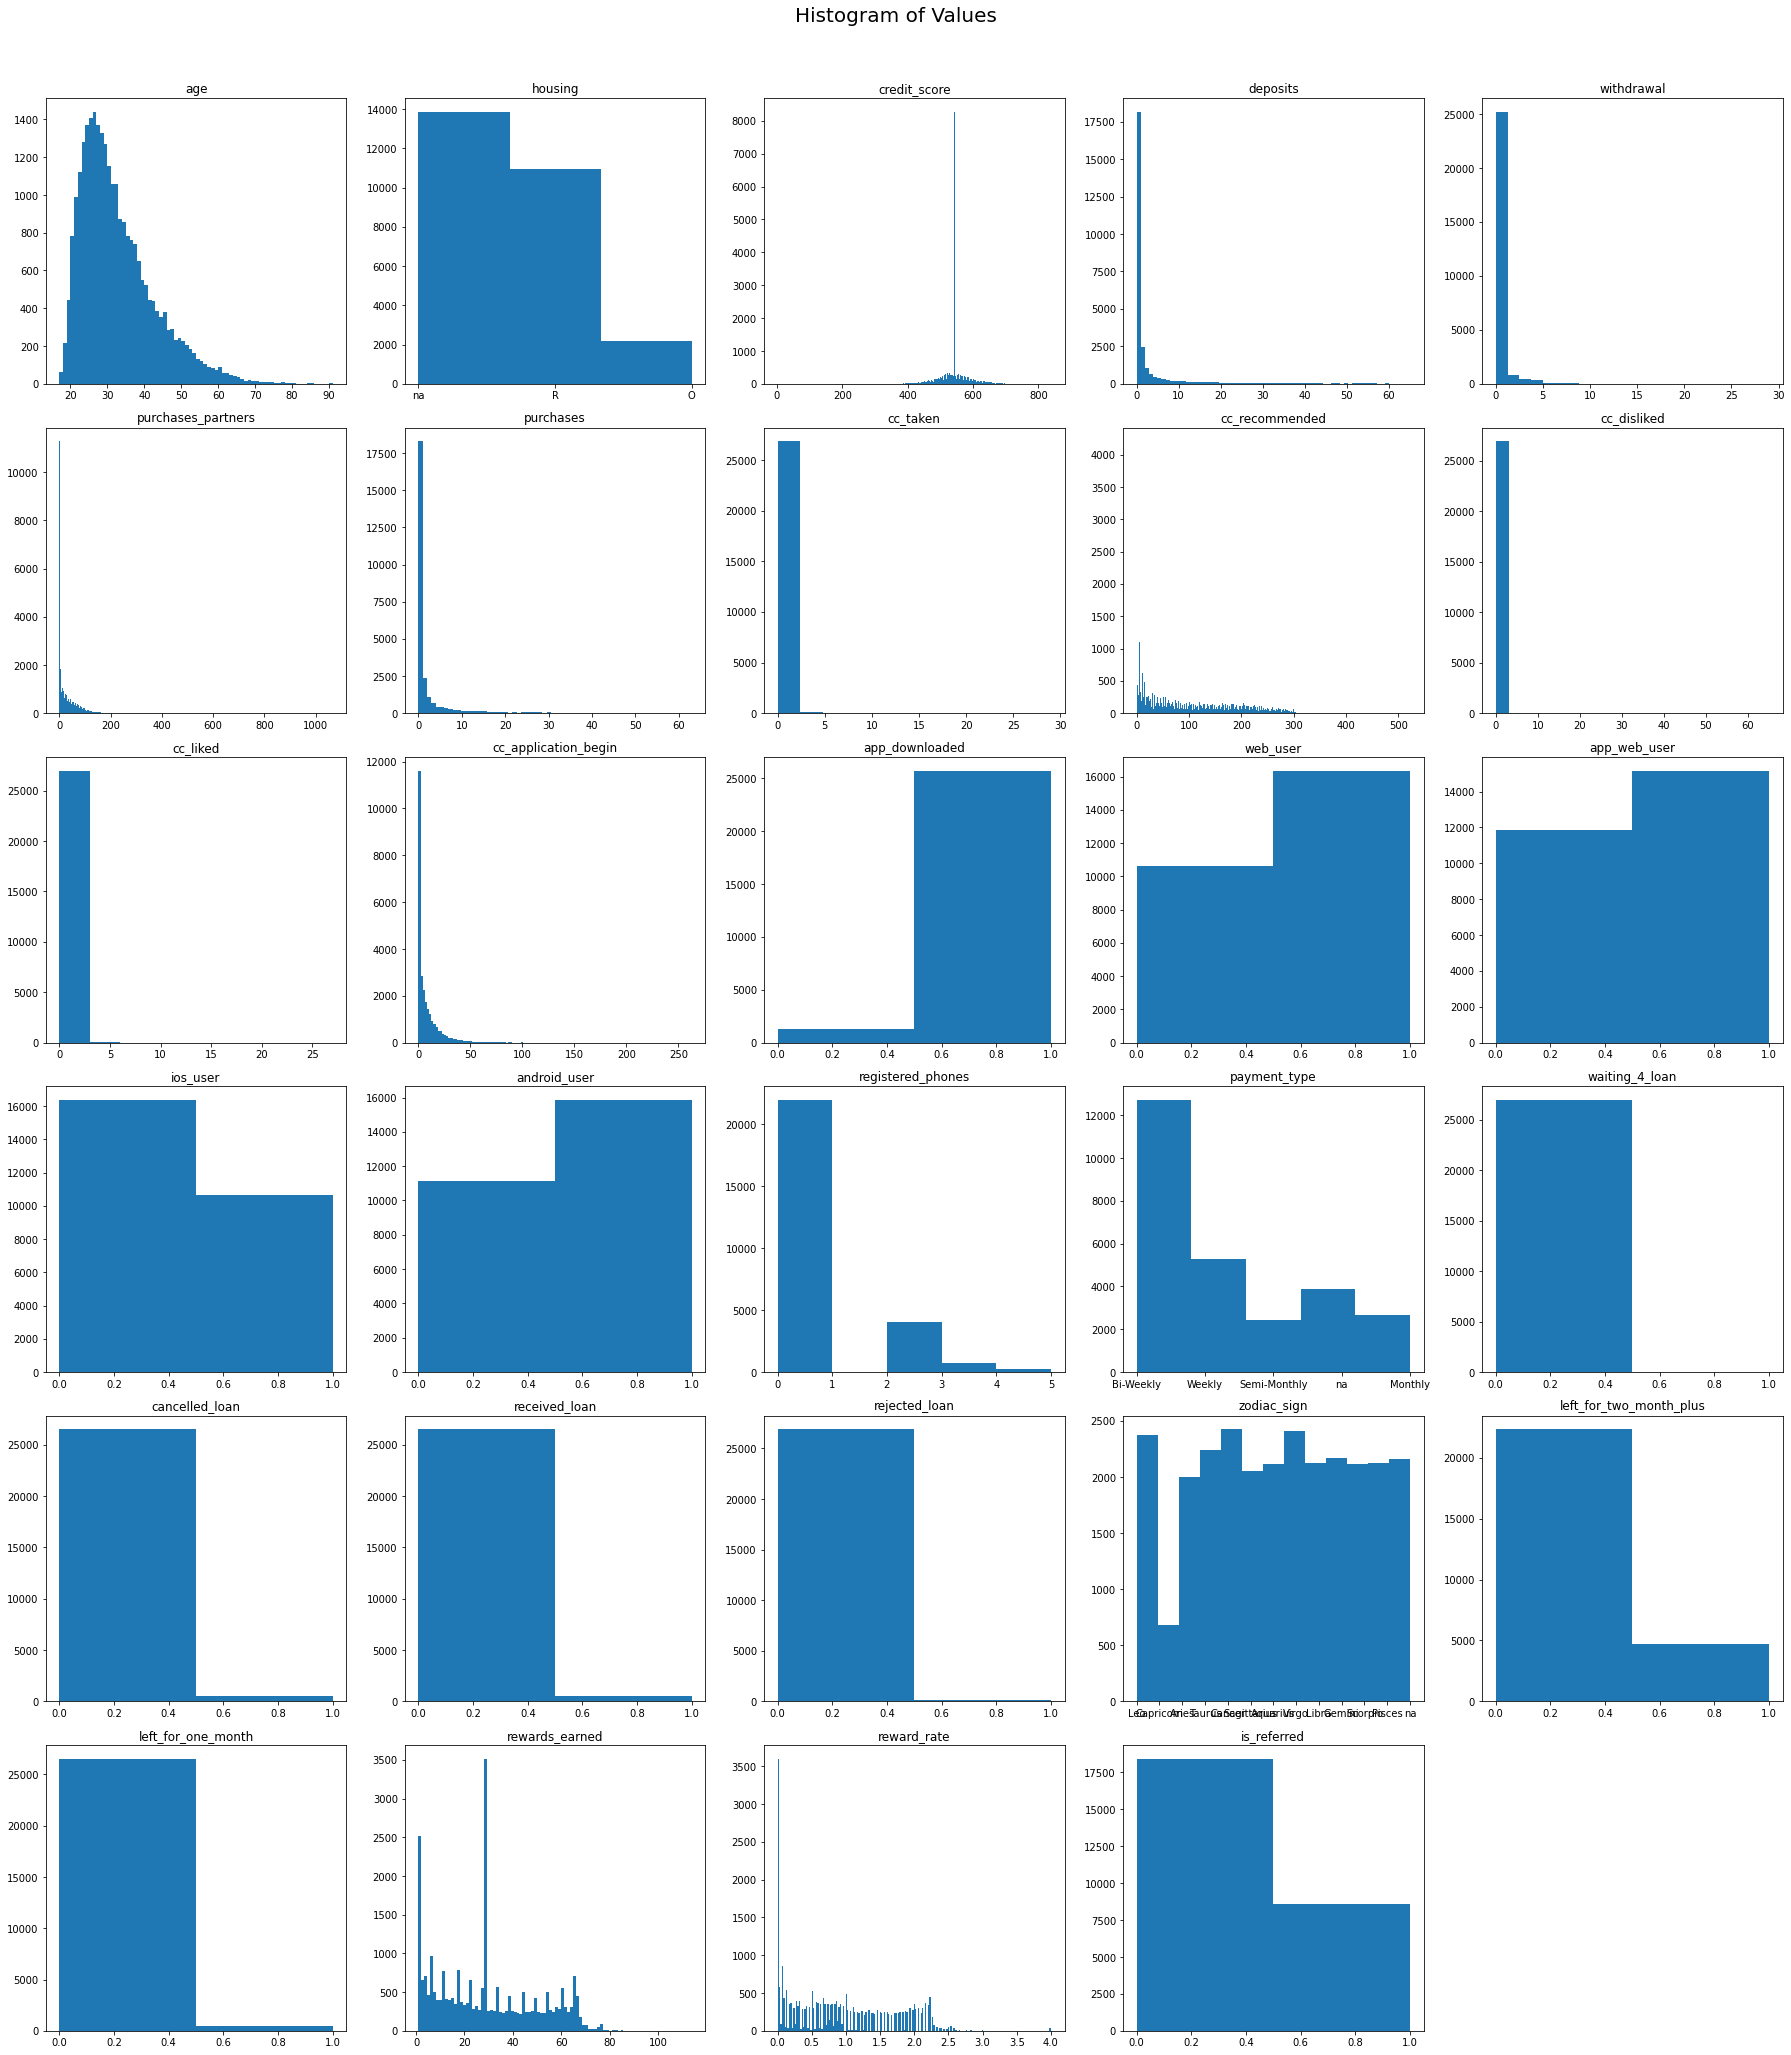

In [10]:
plot_hist_each_col(df.drop(columns=['user','churn']))

In [11]:
def plot_pie_each_col(dataFrame):
    col=np.floor(np.sqrt(dataFrame.shape[1]))
    row=int(dataFrame.shape[1]/col)+1
    plt.figure(figsize=(5*col,5*row));
    plt.suptitle("Pie Chart of Values",fontsize=20);
    for i in range(0,dataFrame.shape[1]):
        plt.subplot(row,col,i+1);
        f=plt.gca();
        f.set_title(dataFrame.columns[i]);
        values=dataFrame.iloc[:,i].value_counts(normalize=True).values;
        indexs=dataFrame.iloc[:,i].value_counts(normalize=True).index;
        plt.pie(values, labels=indexs);
    plt.tight_layout(rect=[0,0.03,1,0.95]);
    #plt.savefig('Pie_Chart.jpg')

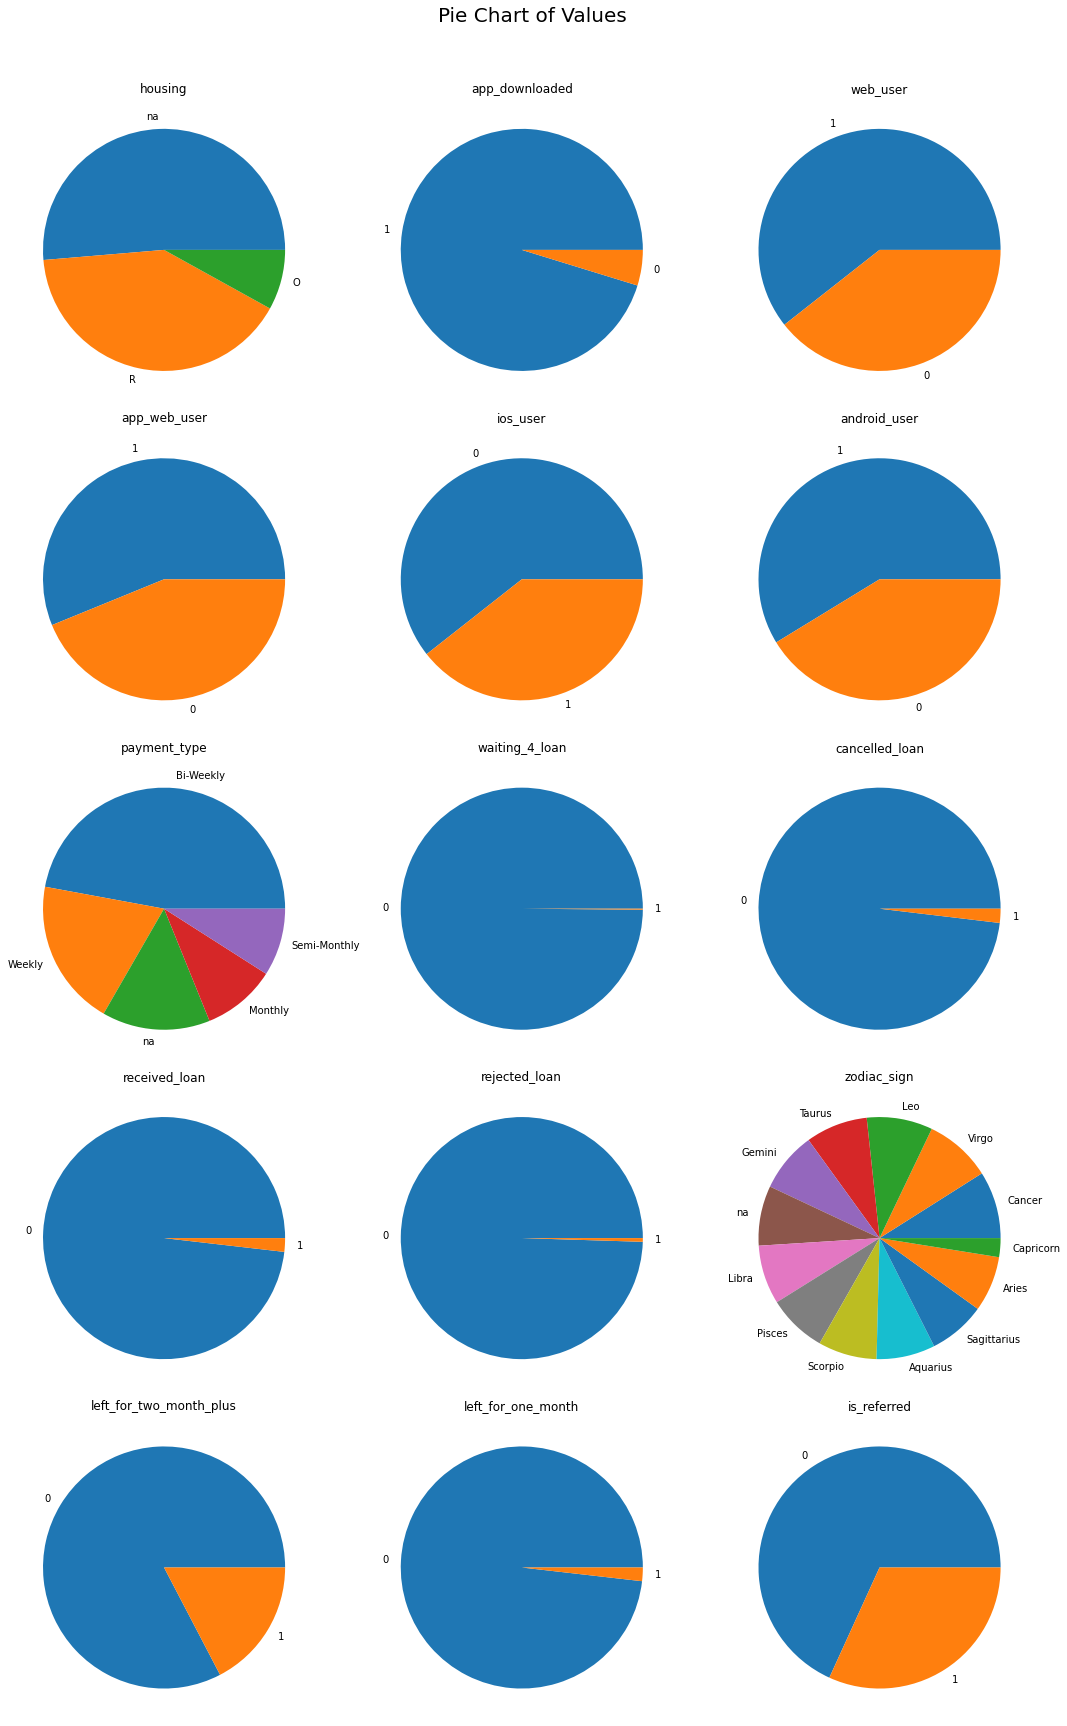

In [12]:
plot_pie_each_col(df[['housing', 'app_downloaded', 'web_user', 'app_web_user', 'ios_user', 'android_user', 'payment_type', 'waiting_4_loan',
                      'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign', 'left_for_two_month_plus', 'left_for_one_month', 'is_referred']])

###Analyzing Binary value column for minority value

In [13]:
uneven_col=['app_downloaded', 'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan', 'left_for_one_month'];
for col in uneven_col:
    minor=df[col].value_counts().index[1];
    print(col, minor)
    print(df[df[col]==minor]['churn'].value_counts())

app_downloaded 0
1    688
0    595
Name: churn, dtype: int64
waiting_4_loan 1
0    27
1     8
Name: churn, dtype: int64
cancelled_loan 1
1    274
0    234
Name: churn, dtype: int64
received_loan 1
1    292
0    199
Name: churn, dtype: int64
rejected_loan 1
1    107
0     25
Name: churn, dtype: int64
left_for_one_month 1
1    266
0    222
Name: churn, dtype: int64


###Correlation with output and correlation matrix

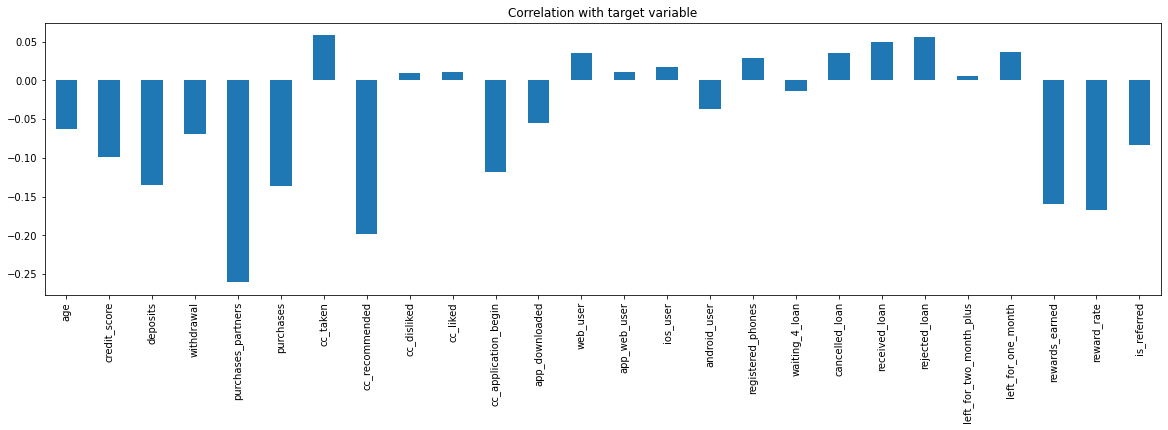

In [14]:
df.drop(columns=['user','churn','housing','payment_type','zodiac_sign']).corrwith(df['churn']).plot.bar(figsize=(20,5),
                                                                                                        title='Correlation with target variable')

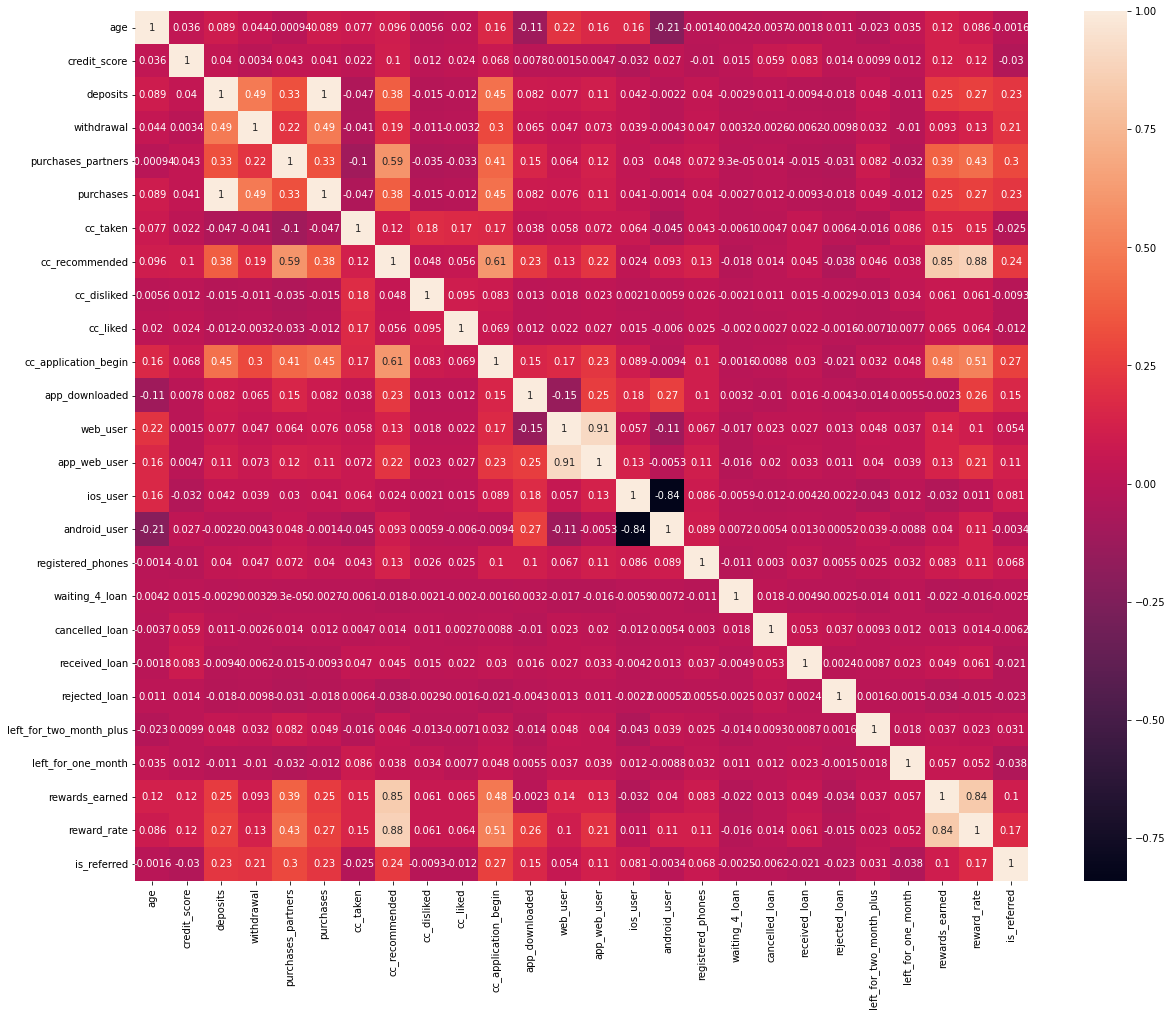

In [15]:
plt.figure(figsize=(20,16))
sns.heatmap(df.drop(columns=['user','churn']).corr(),annot=True)

In [16]:
df.drop(columns=['app_web_user'],inplace=True)

##Data Preparation

###One Hot Encoding

In [17]:
df=pd.get_dummies(df)
df.columns

Index(['user', 'churn', 'age', 'credit_score', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred', 'housing_O', 'housing_R', 'housing_na',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly', 'payment_type_na',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo',
       'zodiac_sign_na'],
      dtype='object')

In [18]:
#Removing columns so that they remain independent features
df.drop(columns=['housing_na','payment_type_na','zodiac_sign_na'],inplace=True)

###Splitting train and test dataset

In [19]:
X=df.drop(columns=['user','churn'])
y=df['churn']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

###Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

##Model Building

In [22]:
#Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
def heatmap_confusion_matrix(y_true,y_pred):
    cm=confusion_matrix(y_true,y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(6,4))
    sns.set(font_scale=1.2)
    sns.heatmap(cm,annot=labels,fmt='',cmap='Blues')
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.show()

#Classification Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
def classification_metrics(y_true,y_predict,y_probability):
    print("Accuracy Score  : ",round(accuracy_score(y_true,y_predict),3))
    print("Precision Score : ",round(precision_score(y_true,y_predict),3))
    print("Recall Score    : ",round(recall_score(y_true,y_predict),3))
    print("F1 Score        : ",round(f1_score(y_true,y_predict),3))
    print("roc_auc_score   : ",round(roc_auc_score(y_true,y_probability),3))

#Evaluate Binary Classification Model
def evaluate_model(model,train_X,test_X,train_y,test_y,name):
    print(name)
    model.fit(train_X,train_y)
    m_pred=model.predict(test_X)
    m_prob=model.predict_proba(test_X)[:,1]
    heatmap_confusion_matrix(test_y,m_pred)
    classification_metrics(test_y,m_pred,m_prob)

Logistic Regression


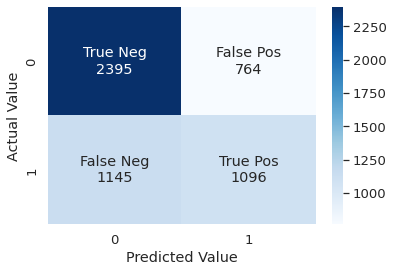

Accuracy Score  :  0.646
Precision Score :  0.589
Recall Score    :  0.489
F1 Score        :  0.535
roc_auc_score   :  0.685


In [23]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
evaluate_model(log_model, X_train, X_test, y_train, y_test, "Logistic Regression")

Random Forest Classifier


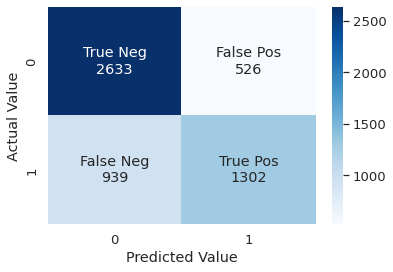

Accuracy Score  :  0.729
Precision Score :  0.712
Recall Score    :  0.581
F1 Score        :  0.64
roc_auc_score   :  0.805


In [24]:
from sklearn.ensemble import RandomForestClassifier
rd_model=RandomForestClassifier()
evaluate_model(rd_model, X_train, X_test, y_train, y_test, "Random Forest Classifier")

XG Boost Classifier


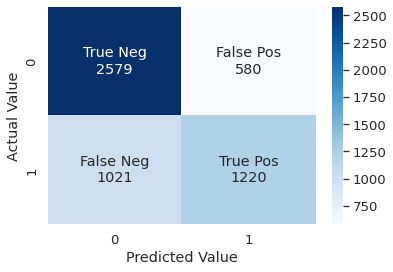

Accuracy Score  :  0.704
Precision Score :  0.678
Recall Score    :  0.544
F1 Score        :  0.604
roc_auc_score   :  0.759


In [25]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XG Boost Classifier")

###Cross Validation in Random Forest

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=rd_model, X=X_train, y=y_train, cv=10)
accuracies.mean()

0.7308333333333334

In [27]:
accuracies

array([0.72731481, 0.7587963 , 0.70833333, 0.72916667, 0.72731481,
       0.73101852, 0.71342593, 0.73611111, 0.74814815, 0.7287037 ])

###Feature Importance in Random forest

In [28]:
#Creating Plot of Feature Importance
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
def plot_feature_importance(feature_val,col,model_name):
    feature_imp = pd.DataFrame(sorted(zip(feature_val,col)), columns=['Value','Feature'])
    plt.figure(figsize=(16, 10))
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
    plt.title(model_name+' Feature importance')
    plt.tight_layout()
    plt.show()

In [29]:
rd_model.feature_importances_

array([0.10182433, 0.08997498, 0.02190895, 0.00979382, 0.13322209,
       0.02344452, 0.00716742, 0.09559552, 0.00367171, 0.00161394,
       0.05367082, 0.00215769, 0.0162854 , 0.01220085, 0.01235878,
       0.01779048, 0.00024034, 0.0044693 , 0.00496288, 0.00185806,
       0.01443043, 0.00319784, 0.08163078, 0.0922411 , 0.01284779,
       0.00728167, 0.01589128, 0.01680425, 0.00950805, 0.00914443,
       0.01204193, 0.00942256, 0.00930287, 0.01000535, 0.00470978,
       0.01018225, 0.00977675, 0.0089336 , 0.00951356, 0.00951649,
       0.00920385, 0.00988614, 0.01031538])

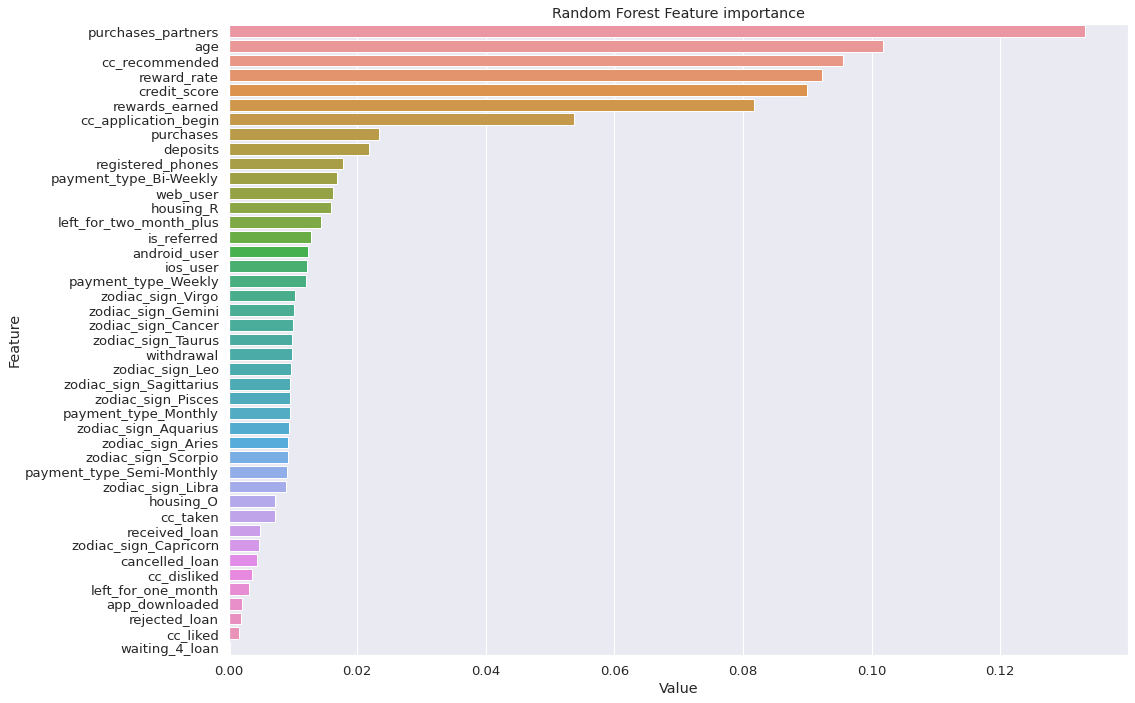

In [31]:
X_col=df.drop(columns=['user','churn']).columns
plot_feature_importance(rd_model.feature_importances_, X_col, "Random Forest")

##Feature Selection

In [33]:
from sklearn.feature_selection import RFE
my_model=RandomForestClassifier()
rfe=RFE(my_model, 20)
rfe=rfe.fit(X_train,y_train)
rfe.support_

array([ True,  True,  True, False,  True,  True, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False, False,
       False, False,  True, False,  True,  True,  True, False,  True,
        True, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False,  True])

In [37]:
X_col[rfe.support_]

Index(['age', 'credit_score', 'deposits', 'purchases_partners', 'purchases',
       'cc_recommended', 'cc_application_begin', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'left_for_two_month_plus',
       'rewards_earned', 'reward_rate', 'is_referred', 'housing_R',
       'payment_type_Bi-Weekly', 'payment_type_Weekly', 'zodiac_sign_Gemini',
       'zodiac_sign_Virgo'],
      dtype='object')

In [43]:
X_train=X_train[:,rfe.support_].copy()
X_test =X_test[: ,rfe.support_].copy()

Random Forest Classifier


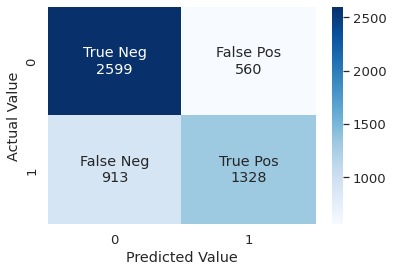

Accuracy Score  :  0.727
Precision Score :  0.703
Recall Score    :  0.593
F1 Score        :  0.643
roc_auc_score   :  0.794


In [46]:
my_model=RandomForestClassifier()
evaluate_model(my_model, X_train, X_test, y_train, y_test, "Random Forest Classifier")